<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/ModuleB_MAT421_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B (HW 2) - MAT 421 #
#### Santana Chaidez ####

____
## Interpolation Problem Statement ##
___

In [7]:
import numpy as np
# importing Python library, NumPy, which fascilitates various forms of scientific computing
import matplotlib.pyplot as plt
# library MatPlotLib allows us to create visuals and plot data points



*   **Interpolation** involves creating a predictive function as a model by using actual, discrete data points
*   The discrete data points we have are used to guess - or **interpolate** - what happens **in between** these points
* Requires accurate/reliable data
* Unlike regression, does not require underlying model for the data, and passes through all data points

Will use discrete (x_i, y_i) data points to find estimation function y_hat(x_i) = y_i


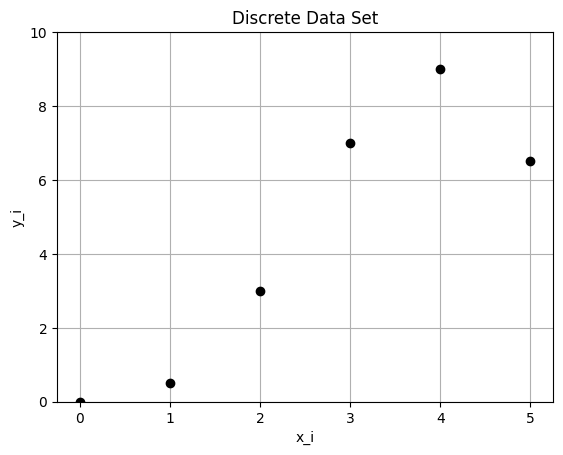

In [10]:
# establishing a set of independent x values and dependent y values to create discrete data points
x = np.linspace(0,5,6)
y = [0, 0.5, 3, 7, 9, 6.5]

# plot data points
plt.plot(x, y, 'ko')
plt.grid(True)
plt.ylim(0,10)
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.title('Discrete Data Set')
plt.show()

____
## Linear Interpolation ##
___

* **Linear interpolation** assumes estimated points lie on lines connecting the discrete data points together
* Algebraically, we would write this relationship as:
y_hat(x) = y_i + (y_i+1 - y_i)(x - x_i)/(x_i+1 - x_i), where x_i < x < x_i+1
* So y_hat(x) is our predictive function, and x is our estimated value between esitsting discrete values x_i and x_i+1

In [11]:
from scipy.interpolate import interp1d
# use interp1d to verify our linear interpolation model

x = np.linspace(0,5,6)
y = [0, 0.5, 3, 7, 9, 6.5]
# use previously-defined discrete data set to find linear interpolation at x = 2.5

f = interp1d(x, y)
y_hat = f(2.5)
print('Estimated value y_hat at x=2.5, y_hat(2.5)=')
print(y_hat)

Estimated value y_hat at x=2.5, y_hat(2.5)=
5.0


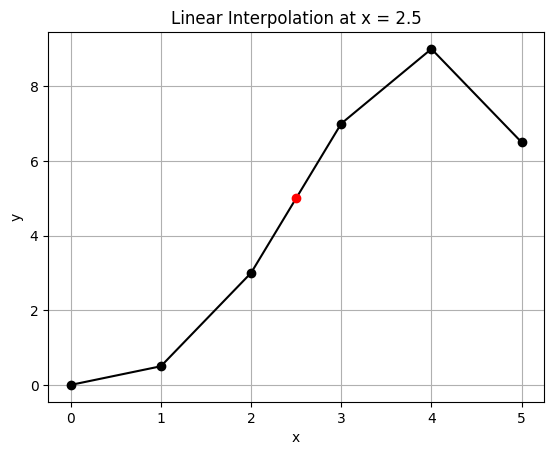

In [12]:
# visualize linear interpolation on plot
plt.plot(x, y, '-ok')
plt.plot(2.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 2.5')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

____
## Cubic Spline Interpolation ##
___

* **Cubic spline interpolation** composes an estimating interpolation function from a set of piecewise cubic functions
* Joins discrete data points with cubic polynomials instead of lines
* Each cubic polynomial joins data points (x_i, y_i) and (x_i+1, y_i+1) with the function S_i(x) = a_i(x^3) + b_i(x^2) + c_i(x) + d_i
* Valid for x_i < x < x_i+1, where i = 1, 2, ..., n-1
* For n discrete points, there are n-1 cubic functions, each with 4 coefficients --> results in 4(n-1) unknowns requiring 4(n-1) independent equations

Conditions to find the coefficients for these cubic polynomials:
* Cubic functions intersect at shared data points
* Continuous first and second derivatives at data points so cubic functions join smoothly
* Two final constraints depending on circumstances of interpolation --> ex. assume the second derivatives are zero at endpoints to make curve at these points a end as straight line

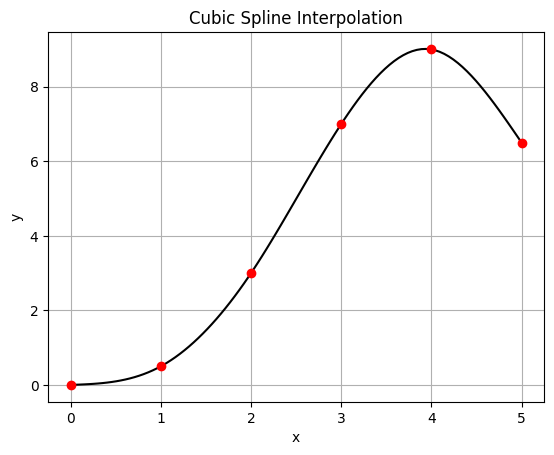

In [13]:
from scipy.interpolate import CubicSpline
# use CubicSpline to perform cubic spline interpolation on our discrete data set

x = np.linspace(0,5,6)
y = [0, 0.5, 3, 7, 9, 6.5]
# use previously-defined discrete data set to find cubic spline interpolation for 0 < x < 5

f = CubicSpline(x, y, bc_type='natural')
# using bc_type = 'natural' to add the described constraints
x_new = np.linspace(0, 5, 100)
y_new = f(x_new)

# plot this cubic spline interpolation on our data set
plt.plot(x_new, y_new, 'k')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Note: can write the constraints explicitly as a system of linear equations with 4(n-1) unknowns in order to find the coefficients of each cubic polynomial function

For our data set:
* x1 = 0, x2 = 1, x3 = 2, x4 = 3, x5 = 4, x6 = 5
* y1 = 0, y2 = 0.5, y3 = 3, y4 = 7, y5 = 9, y6 = 6.5

Constraint 1 --> S_i(x_i) = y_i:
* Example: a1(x1)^3 + b1(x1)^2 + c1(x1) + d1 = y1

Constraint 2 --> S_i(x_i+1) = y_i+1:
* Example: a1(x2)^3 + b1(x2)^2 + c1(x2) + d1 = y2

Constraint 3 --> S_i'(x_i+1) = S_i+1'(x_i+1):
* Example: 3(a1)(x2)^2 + 2(b1)(x2) + c1 - 3(a2)(x2)^2 - 2(b2)(x2) - c2 = 0

Constraint 4 --> S_i''(x_i+1) = S_i+1''(x_i+1):
* Example: 6(a1)(x2) + 2(b1) - 6(a2)(x2) - 2(b2) = 0

Endpoint Constraints --> S_1''(x1) = 0 and S_n-1''(x_n) = 0:
* Example: 6(a1)(x1) + 2(b1) = 0
* Example: 6(a5)(x6) + 2(b5) = 0

Solve linear equations using matrix equation Ax = b, where x is the array of coefficients.

In [24]:
# our data set
x1 = 0
x2 = 1
x3 = 2
x4 = 3
x5 = 4
x6 = 5
y1 = 0
y2 = 0.5
y3 = 3
y4 = 7
y5 = 9
y6 = 6.5

# array of coefficients, x = [a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3, a4, b4, c4, d4, a5, b4, c5, d5]
b = np.array([y1, y2, y3, y4, y5, y2, y3, y4, y5, y6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([
    [x1**3, x1**2, x1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, x2**3, x2**2, x2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, x3**3, x3**2, x3, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, x4**3, x4**2, x4, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, x5**3, x5**2, x5, 1], \
       [x2**3, x2**2, x2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, x3**3, x3**2, x3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, x4**3, x4**2, x4, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, x5**3, x5**2, x5, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, x6**3, x6**2, x6, 1], \
             [3*x2**2, 2*x2, 1, 0, -3*x2**2, -2*x2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3*x3**2, 2*x3, 1, 0, -3*x3**2, -2*x3, -1, 0, 0, 0, 0, 0, 0, 0,  0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 3*x4**2, 2*x4, 1, 0, -3*x4**2, -2*x4, -1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3*x5**2, 2*x5, 1, 0, -3*x5**2, -2*x5, -1, 0], \
             [6*x2, 2, 0, 0, -6*x2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6*x3, 2, 0, 0, -6*x3, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6*x4, 2, 0, 0, -6*x4, -2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6*x5, 2, 0, 0, -6*x5, -2, 0, 0], \
             [6*x1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6*x6, 2, 0, 0]])

In [26]:
# matrix of our cubic polynomial coefficients
np.dot(np.linalg.inv(A), b)

array([[ 4.11483254e-01],
       [ 0.00000000e+00],
       [ 8.85167464e-02],
       [-6.95971059e-15],
       [-5.74162679e-02],
       [ 1.40669856e+00],
       [-1.31818182e+00],
       [ 4.68899522e-01],
       [-6.81818182e-01],
       [ 5.15311005e+00],
       [-8.81100478e+00],
       [ 5.46411483e+00],
       [-7.15311005e-01],
       [ 5.45454545e+00],
       [-9.71531100e+00],
       [ 6.36842105e+00],
       [ 1.04306220e+00],
       [-1.56459330e+01],
       [ 7.46866029e+01],
       [-1.06167464e+02]])